In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from array import *

In [11]:
m=10000
x_train=np.random.uniform(-10,10, size=(m,2))
y_train =np.zeros(shape=(m,1), dtype='int32')
np.random.seed()
for i in range (m):
    np.random.seed()
    coef=np.random.randint(0,2)
    if (coef == 1):
        x_train[i][1] = x_train[i][0] *x_train[i][0] 
        y_train[i] = 1
    if(coef == 0):
        x_train[i][1] = np.random.uniform(0, 100)
        y_train[i] = 0

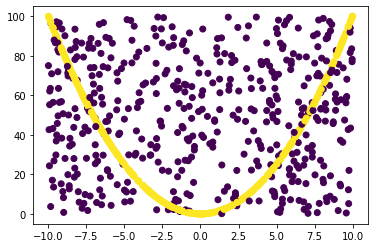

In [3]:
x = [0]*m
y = [0]*m
color = [0]*m
for i in range (m):
    x[i] = x_train[i][0]
    y[i] = x_train[i][1]
    if (y_train[i] ==1):
        color[i]=1
 
plt.scatter(x,y, c = color)

In [12]:
discriminator = tf.keras.models.Sequential([
    tf.keras.layers.Dense(25, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])   

In [13]:
optimizer = tf.keras.optimizers.Adam(0.0001)
discriminator.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])
discriminator.fit(x_train, y_train, epochs=1000,verbose=0)

In [ ]:
a = np.random.uniform(-10,10, size=(100,2))
y_train =[0]*100
print(a)
for i in range (100):
    np.random.seed()
    coef=np.random.randint(0,2)
    if (coef == 1):
        a[i][1] = a[i][0] *a[i][0] 
        y_train[i] = 1
    if(coef == 0):
        y_train[i] = 0
        a[i][1] = np.random.uniform(0, 100)
        
print(a)

x = [0]*100
y = [0]*100

for i in range (100):
    x[i] =a[i][0]
    y[i] =a[i][1]
 
plt.scatter(x,y,c=y_train)

In [ ]:
y_train =np.zeros(shape=(10,1), dtype = 'int32')
print(y_train)